# physics724: Advanced Methods of Data Analysis

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Remember to delete the `raise NotImplementedError()` statements as you implement your solutions.

---

# Exercise 7: Multivariate analysis with BDTs

For this exercise we recommend using [SciKit-Learn](https://scikit-learn.org/stable/index.html), which you can install using `pip3 install --user sklearn`

## Machine Learning for the $\tau^-\to\mu^-\mu^+\mu^-$ search at LHCb

The LHCb experiment at CERN is able to search for exotic decays of the $\tau$ lepton to three muons. This process is fobidden in the Standard Model but is predicted to be sizeable in several theories beyond the Standard Model.

Your goal is to maximise the chances to find this decay in the dataset collected by LHCb using a Machine Learning technique to classify the recorded events as signal or background.

You are given a dataset composed of labelled signal (`signal==1`) and background (`signal==0`) events. Each event is described by a set of *features* whose distribution might be different between signal and background. The goal is to train a Machine Learning classifier to guess if an event is signal or background based on these features.

Here's the list of features recorded in the dataset that you can use for the classification:
* `DecayTime` - How long the $\tau$ candidate existed before decaying.
* `IP` - [Impact parameter](https://en.wikipedia.org/wiki/Impact_parameter) of the $\tau$ candidate and the collision point.
* `VertexChi2` - The $\chi^2$ of a fit to locate the $\tau$ decay vertex.
* `pt` - Transverse momentum of the $\tau$.
* `DOCAone` - Distance of closest approach between first and second muons.
* `DOCAtwo` - Distance of closest approach between second and third muons.
* `DOCAthree` - Distance of closest approach between first and third muons.
* `isolationa` - Track isolation variable.
* `isolationb` - Track isolation variable.
* `isolationc` - Track isolation variable.
* `p0_pt` - Transverse momentum of the first muon.
* `p1_pt` - Transverse momentum of the second muon.
* `p2_pt` - Transverse momentum of the third muon.
* `p0_IP` - Impact parameter of the first muon.
* `p1_IP` - Impact parameter of the second muon.
* `p2_IP` - Impact parameter of the third muon.

In [1]:
import pandas as pd
d = pd.read_csv('training_reduced.csv')

In [2]:
d.columns

Index(['signal', 'LifeTime', 'IP', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo',
       'DOCAthree', 'isolationa', 'isolationb', 'isolationc', 'p0_pt', 'p1_pt',
       'p2_pt', 'p0_IP', 'p1_IP', 'p2_IP'],
      dtype='object')

1. Calculate the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) between signal and background for each of the features of the dataset. The test evaluates how likely are two data samples to be drawn from the same PDF, and therefore should be larger for the features that are most powerful to discriminate signal and background.

*Hint:* you can use the [`ks_2samp` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) from `scipy.stats` to compute the Kolmogorov-Smirnov test between two samples

*Hint:* you can get the list of features from the DataFrame column headings, i.e. `d.keys()`

In [1]:
from scipy.stats import ks_2samp
# help(ks_2samp)

In [4]:
columns = ['LifeTime', 'IP', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'isolationa', 'isolationb', 'isolationc', 'p0_pt',
           'p1_pt', 'p2_pt', 'p0_IP', 'p1_IP', 'p2_IP']
for i in range (len(columns)):
    x = d[columns[i]][:25879]
    y = d[columns[i]][25879:]
    print("Feature : " + str(columns[i]) + " -", ks_2samp(x,y))

Feature : LifeTime - Ks_2sampResult(statistic=0.14423987132737376, pvalue=6.255480873551991e-289)
Feature : IP - Ks_2sampResult(statistic=0.5503323429451006, pvalue=0.0)
Feature : VertexChi2 - Ks_2sampResult(statistic=0.28567312506181025, pvalue=0.0)
Feature : pt - Ks_2sampResult(statistic=0.1377976891036844, pvalue=9.811177056126434e-264)
Feature : DOCAone - Ks_2sampResult(statistic=0.15488706886849868, pvalue=0.0)
Feature : DOCAtwo - Ks_2sampResult(statistic=0.15537702908242712, pvalue=0.0)
Feature : DOCAthree - Ks_2sampResult(statistic=0.14469064866972225, pvalue=9.776358724748002e-291)
Feature : isolationa - Ks_2sampResult(statistic=0.24067798381021005, pvalue=0.0)
Feature : isolationb - Ks_2sampResult(statistic=0.16782063583131873, pvalue=0.0)
Feature : isolationc - Ks_2sampResult(statistic=0.1686414213935396, pvalue=0.0)
Feature : p0_pt - Ks_2sampResult(statistic=0.10270530235899855, pvalue=1.0634430433279355e-146)
Feature : p1_pt - Ks_2sampResult(statistic=0.1370815349196095, pv

2. The least and most discriminating features are the ones with the lowest and highest Kolmogorov-Smirnov scores, respectively. Compare the signal and background distributions for these two features.

**NB:** please do not use the label `signal` as a feature!

#### From the above result we can see that the least discriminating feature is the impact parameter of the second muon 'p1_IP' and the most discriminating feature is the impact parameter of the $\tau$.

In [5]:
# splitting the data with respect to background and signal
tauIP_back = d['IP'][:25879] # impact parameter for tau for background
tauIP_signal = d['IP'][25879:] # impact parameter for tau for signal
muonIP_back = d['p1_IP'][:25879] # IP for muon for background
muonIP_signal = d['p1_IP'][25879:] # IP for muon for signal

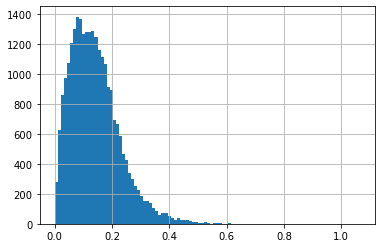

In [6]:
#background distribution for tauIP
tauIP_back.hist(bins=100)

[(-0.2, 1)]

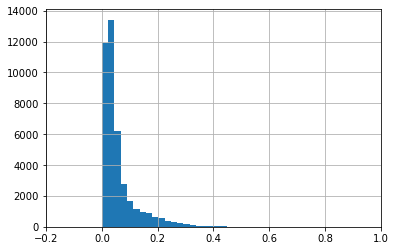

In [7]:
#signal distribution for tauIP
tauIP_signal.hist(bins=100).set(xlim=(-0.2,1))

[(0, 3)]

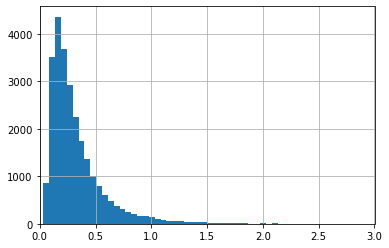

In [8]:
#background distribution for muonIP
muonIP_back.hist(bins=100).set(xlim=(0,3))

[(0, 3)]

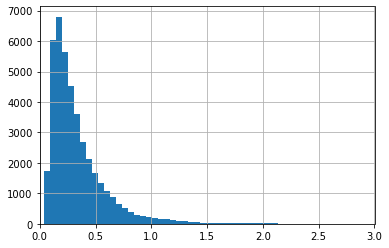

In [9]:
#signal distribution for muonIP
muonIP_signal.hist(bins=100).set(xlim=(0,3))

3. Split the dataset *randomly* in two halves: we will use one half for training our classifier and the other half to test it.

*Hint:* you can use the function `train_test_split` from `sklearn.model_selection`

**NB:** the dataset is ordered by `signal`, hence the need for random splitting.

In [10]:
from sklearn.model_selection import train_test_split

X = d.drop(['signal', 'LifeTime', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'isolationb', 'isolationc', 'p0_pt',
           'p1_pt', 'p2_pt', 'p0_IP', 'p1_IP', 'p2_IP'], axis=1) # we are considering only three most discriminating features
Y = d.signal.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state=42) # splitting the data

4. Now train a gradient-boosted decision tree (GBDT) on the training sample using the three features of your choice (possibly the most discriminant ones). You can use [`GradientBoostingClassifier` from `sklearn.ensemble`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [12]:
#In collaboration with Divyanshu Katiyar
gbdt = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=0).fit(X_train, y_train)
gbdt.score(X_test, y_test)

0.7895017319477751

5. Calculate the classifier response on both the training and testing samples and overlay histograms of the response for signal and background.

*Hint:* to evaluate the response use `gbdt.decision_function(features)`

In [13]:
#In collaboration with Divyanshu Katiyar
clr_training = gbdt.decision_function(X_train) # classifier response for training sample
clr_test = gbdt.decision_function(X_test) # classifier response for the test sample
print(clr_training)
print(clr_test)

[-1.77852184  2.61640675  0.32153411 ...  1.59789025 -2.29169173
 -2.44343833]
[-0.95882224  3.70769928 -0.84840712 ...  2.64288979  0.31400093
 -1.64212588]


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 3.400e+01, 7.580e+02, 5.255e+03, 9.886e+03,
        7.564e+03, 1.008e+04, 1.830e+02, 6.000e+00, 1.000e+00, 2.000e+00]),
 array([-42.95705832, -41.1436795 , -39.33030067, -37.51692185,
        -35.70354302, -33.8901642 , -32.07678537, -30.26340655,
        -28.45002772, -26.6366489 , -24.82327007, -23.00989125,
        -21.19651242, -19.3831336 , -17.56975477, -15.75637595,
        -13.94299712, -12.1296183 , -10.31623947,  -8.50286065,
         -6.68948182,  -4.876103  ,  -3.06272417,  -1.24934534,
          0.56403348,   2.37741231,   4.19079113,   6.00416996,
          7.81754878,   9.63092761,  11.44430643]),
 <a list of 30 Patch objects>)

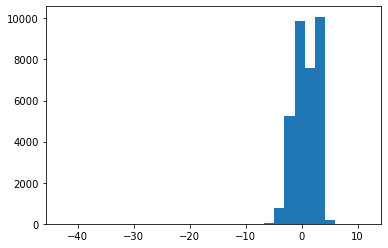

In [14]:
plt.hist(clr_training, bins=30)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        9.000e+00, 3.800e+01, 1.190e+02, 6.040e+02, 1.359e+03, 2.608e+03,
        3.758e+03, 4.809e+03, 3.237e+03, 2.874e+03, 3.810e+03, 7.038e+03,
        3.170e+03, 2.350e+02, 7.300e+01, 1.400e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-10.77342388, -10.00208771,  -9.23075155,  -8.45941538,
         -7.68807922,  -6.91674305,  -6.14540689,  -5.37407072,
         -4.60273456,  -3.83139839,  -3.06006223,  -2.28872606,
         -1.5173899 ,  -0.74605373,   0.02528244,   0.7966186 ,
          1.56795477,   2.33929093,   3.1106271 ,   3.88196326,
          4.65329943,   5.42463559,   6.19597176,   6.96730792,
          7.73864409,   8.50998025,   9.28131642,  10.05265259,
         10.82398875,  11.59532492,  12.36666108]),
 <a list of 30 Patch objects>)

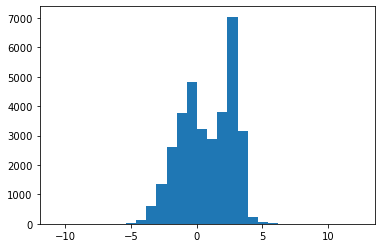

In [15]:
plt.hist(clr_test, bins=30)

6. Check if there is overtraining by performing a Kolmogorov-Smirnov test on the GBDT response between the training and testing sample. If you did not overtrain the classifier, its response should be the same on the training and testing samples both for signal and for background. Therefore the K-S scores should be small (~0.01).

In [16]:
ks_2samp(clr_training, clr_test) 

Ks_2sampResult(statistic=0.009409914214706161, pvalue=0.10048266416290746)

#### We see that the KS score is pretty small implying that we did not overtrain the data.

7. Show the performance of your classifier with a ROC curve (if you did not manage to train it, just calculate the ROC for one of the features instead). Plot the ROC curve and label the axes.

*Hint:* you can use the function `roc_curve` from `sklearn.metrics`

In [17]:
from sklearn import metrics
# help(roc_curve)

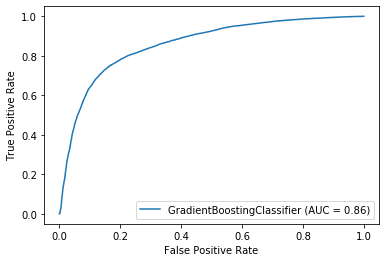

In [18]:
metrics.plot_roc_curve(gbdt, X_test, y_test)

**Bonus**: Try to improve the performance of your classifier by including more features and changing the initialisation options of the `GradientBoostingClassifier` object.

In [29]:
# including more features
#In collaboration with Divyanshu Katiyar
X1 = d.drop(['signal', 'p2_pt', 'p1_IP', 'p2_IP'], axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.5, random_state=42)

In [38]:
gbdt1 = GradientBoostingClassifier(n_estimators=70, learning_rate=0.7, random_state=42).fit(X_train1, y_train1)
gbdt1.score(X_test1, y_test1)

0.8211504870177931

In [39]:
clr_training1 = gbdt1.decision_function(X_train1)
clr_test1 = gbdt1.decision_function(X_test1)
print(clr_training1)
print(clr_test1)

[-1.78332312  0.86929884  1.38091787 ...  1.77344365 -4.32122257
 -1.76484081]
[-1.68254243  4.05052532 -0.95061594 ...  2.94416368  1.67732313
 -3.14628434]


In [40]:
ks_2samp(clr_training1, clr_test1)

Ks_2sampResult(statistic=0.008655210680658054, pvalue=0.1591917461212304)

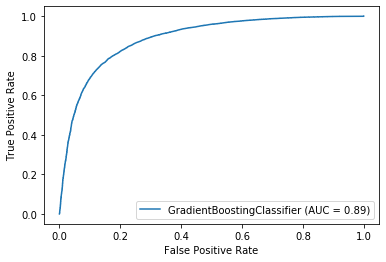

In [41]:
metrics.plot_roc_curve(gbdt1, X_test1, y_test1)